In [1]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_514-Machine-Learning/Data/titanic_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spring 2024/DAT_514-Machine-Learning/Data/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
from sklearn.preprocessing import StandardScaler

def cleaning_data(df):
  # seperating y value
  y = df.pop("Survived")

  # grabbing important features
  X = df[['Pclass', 'Sex', 'Age', 'SibSp',
        'Parch', 'Fare', 'Embarked']]

  string_columns = X.select_dtypes(include=['object']).columns.tolist()
  # one-hot encoding
  X = pd.get_dummies(X, columns=string_columns)
  X = X.drop(['Sex_female'], axis=1)
  X.head()

  # imputing the mean
  X = X.fillna(X.mean())

  #Feature names
  X_name = X.columns.tolist()

  # standardize data
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  return X, y, X_name

In [3]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_name = cleaning_data(train_df)
X_test, y_test, X_name = cleaning_data(test_df)

# gbdt

In [7]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

param_grid = {
    'learning_rate': [ 0.03875, 0.03125, .0375],
    'max_depth': [ 11, 12, 13],
    'n_estimators': [125, 138, 150],
}

lgbm_class = lgb.LGBMClassifier(boosting_type='gbdt', verbose=-1)
grid_search = GridSearchCV(estimator=lgbm_class, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.03125, 'max_depth': 13, 'n_estimators': 138}
Best Score: 0.8428974954491244


In [8]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.898989898989899


In [9]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.0 MB/s eta 0:00:00


In [10]:
import shap
explainer = shap.PermutationExplainer(best_model.predict,X_train)
shap_values = explainer.shap_values(X_test)

PermutationExplainer explainer: 892it [01:06, 13.12it/s]


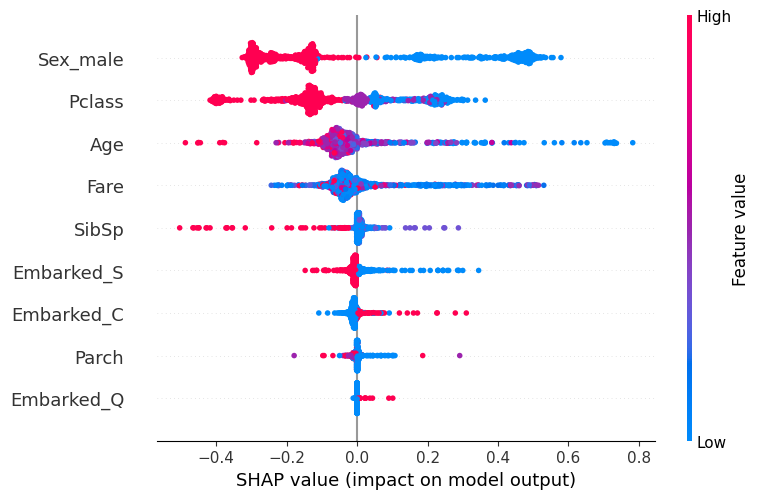

In [11]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
shap.summary_plot(shap_values,X_test,feature_names=X_name)

# random forest

In [21]:
param_grid = {
    'n_estimators': [52, 53, 54],
    'num_leaves': [65, 66, 67],
    'min_child_samples': [1,2,3],
    'learning_rate': [0.0000001, 0.0003125, 0.000625]
}

lgbm_class_rf = lgb.LGBMClassifier(boosting_type='rf', bagging_freq=1, bagging_fraction=0.8, feature_fraction=0.8, verbose=-1)
grid_search = GridSearchCV(estimator=lgbm_class_rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 1e-07, 'min_child_samples': 2, 'n_estimators': 52, 'num_leaves': 65}
Best Score: 0.8384407758458352


In [22]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9180695847362514


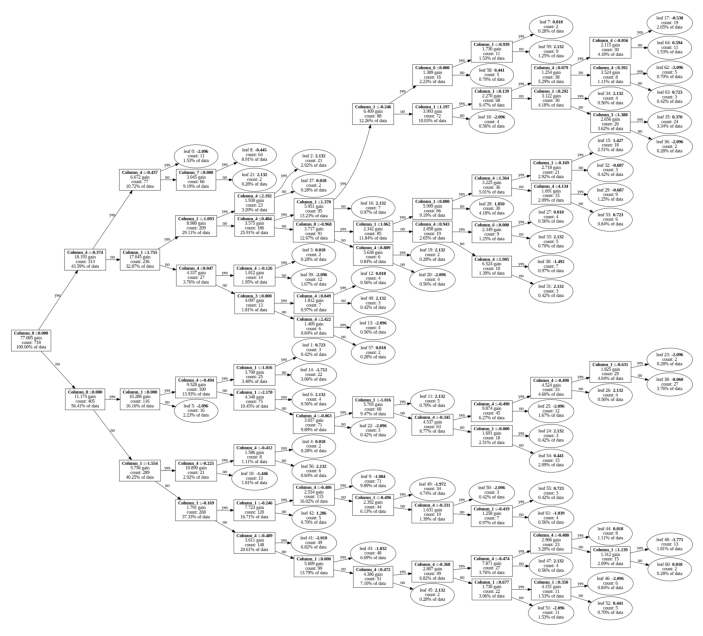

In [23]:
ax = lgb.plot_tree(best_model, tree_index=0, figsize=(20, 8), show_info=['split_gain', 'internal_count', 'leaf_count', 'data_percentage'])
plt.show()


PermutationExplainer explainer: 892it [00:29, 20.00it/s]                         


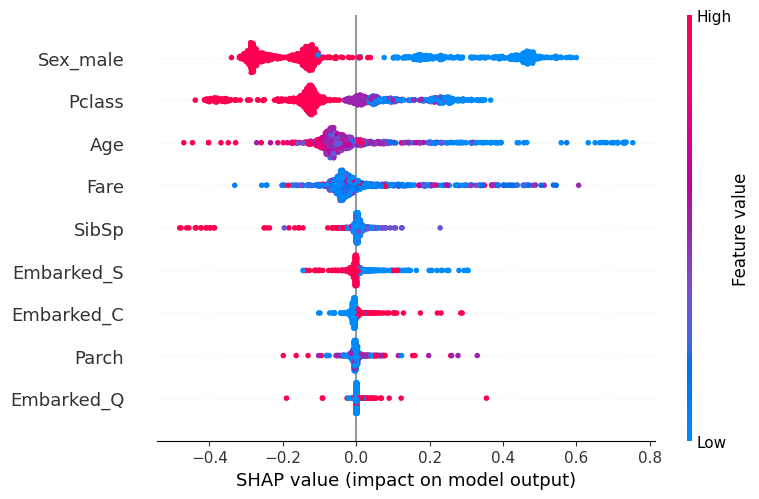

In [14]:
explainer = shap.PermutationExplainer(best_model.predict,X_train)
shap_values = explainer.shap_values(X_test)

fig=plt.figure(figsize=(10,10))
shap.summary_plot(shap_values,X_test,feature_names=X_name)

# dart

In [15]:
param_grid = {
    'n_estimators': [137, 138, 139],
    'num_leaves': [30, 31, 32],
    'learning_rate': [0.1125, 0.11875, 0.125],
      }


lgbm_class_dart = lgb.LGBMClassifier(boosting_type='dart', verbose=-1)
grid_search = GridSearchCV(estimator=lgbm_class_dart, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.1125, 'n_estimators': 138, 'num_leaves': 31}
Best Score: 0.836174753625008


In [16]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9090909090909091


PermutationExplainer explainer: 892it [00:55, 12.94it/s]


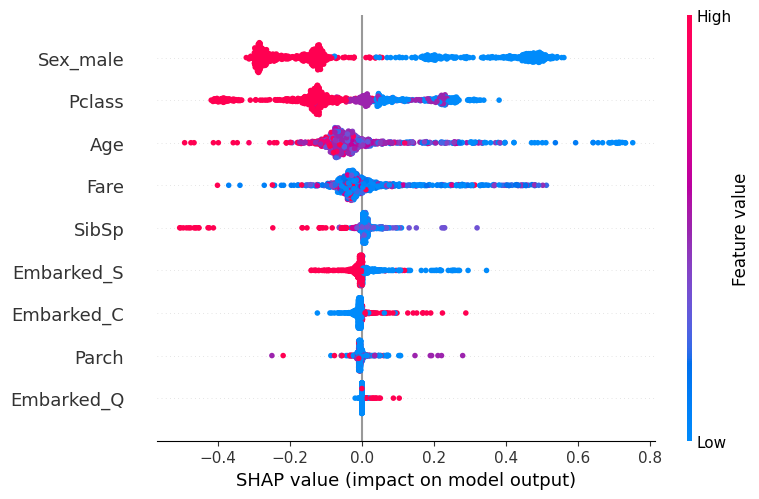

In [17]:
explainer = shap.PermutationExplainer(best_model.predict,X_train)
shap_values = explainer.shap_values(X_test)

fig=plt.figure(figsize=(10,10))
shap.summary_plot(shap_values,X_test,feature_names=X_name)

# gross

In [18]:
param_grid = {
    'n_estimators': [137, 138, 139],
    'num_leaves': [30, 31, 32],
    'learning_rate': [0.1125, 0.11875, 0.125],
      }

lgbm_class_goss = lgb.LGBMClassifier(boosting_type='goss', verbose=-1)
grid_search = GridSearchCV(estimator=lgbm_class_goss, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'learning_rate': 0.11875, 'n_estimators': 137, 'num_leaves': 30}
Best Score: 0.8428912183792605


In [19]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8978675645342312


PermutationExplainer explainer: 892it [00:46, 15.03it/s]                         


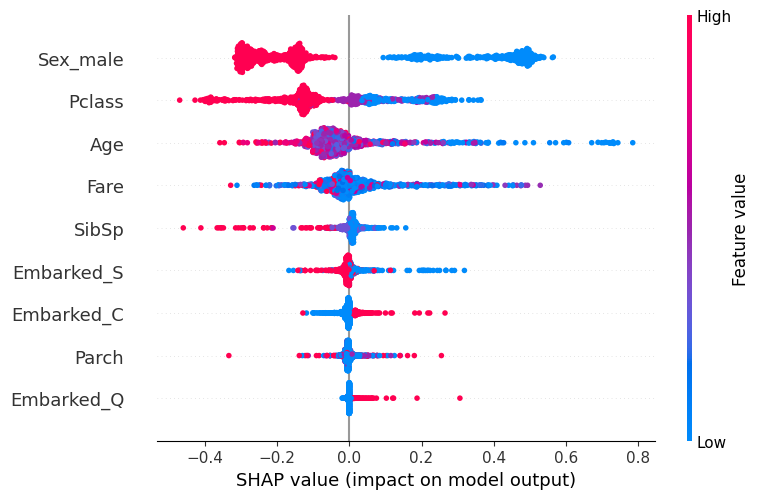

In [20]:
explainer = shap.PermutationExplainer(best_model.predict,X_train)
shap_values = explainer.shap_values(X_test)

fig=plt.figure(figsize=(10,10))
shap.summary_plot(shap_values,X_test,feature_names=X_name)

# Question
Lightgbm has 4 different types of boosting,   gradient boost,  random forest, “dart” and “goss”-  find out what the last two methods are, and explain them.

## Answer
'dart' (dropouts meet multiple additive regression trees), or 'goss' (gradient-based, one-sided sampling).

# Question
- Determine which seems to work best on the titanic data set


## Answer
- Among the selected machine learning models, the one that performed the best was the random forest, achieving a remarkable accuracy of 91.8% on the test dataset.

# Question
- Determine feature importance using the method built into lightgbm



## Answer
- When examining the SHAP feature importance, it became evident that the most significant predictors for survival on the Titanic were the sex, class, and age of the passengers. Specifically, males had a significantly lower chance of survival compared to females. Additionally, passengers in lower-class categories had a reduced likelihood of survival compared to those in first-class. Age also played a crucial role, with older individuals having a lower chance of survival than younger ones.